Blood glucose level estimation from diet intake, insulin dosage, and activity level


1.Analyse the data




In [1]:
datalink='/content/blood_glucose.csv'

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(datalink)
df.head()

,carb_intake_g,insulin_dosage_units,activity_level,time_since_meal_hours,medication_type,stress_level,sleep_hours,hydration_level,diabetes_type,body_mass_index,age,genetic_risk_score,glucose_level_mgdl
0,98.544851,33.153240,Vigorous,6.903038,Metformin,Medium,6.048549,Inadequate,Pre-diabetes,40.409136,41.0,Medium,238.322251
1,95.759835,23.901177,Vigorous,1.050308,Insulin,Medium,7.698804,Inadequate,Gestational,19.972059,33.0,Low,154.309089
2,147.679608,35.208679,Moderate,6.173139,NaN,Medium,5.974567,Inadequate,Type 2,26.263152,52.0,Medium,107.276738
3,66.574704,30.156287,Light,6.817482,Insulin,High,4.935384,Adequate,Gestational,29.283760,29.0,High,70.464152
4,65.745115,24.212904,Vigorous,6.714379,Metformin,Medium,4.003390,Inadequate,Gestational,26.354101,63.0,High,167.714513


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   carb_intake_g          952 non-null    float64
 1   insulin_dosage_units   952 non-null    float64
 2   activity_level         947 non-null    object 
 3   time_since_meal_hours  952 non-null    float64
 4   medication_type        725 non-null    object 
 5   stress_level           955 non-null    object 
 6   sleep_hours            952 non-null    float64
 7   hydration_level        932 non-null    object 
 8   diabetes_type          959 non-null    object 
 9   body_mass_index        950 non-null    float64
 10  age                    954 non-null    float64
 11  genetic_risk_score     947 non-null    object 
 12  glucose_level_mgdl     949 non-null    float64
dtypes: float64(7), object(6)
memory usage: 101.7+ KB


In [5]:
df.describe()

,carb_intake_g,insulin_dosage_units,time_since_meal_hours,sleep_hours,body_mass_index,age,glucose_level_mgdl
count,952.000000,952.000000,952.000000,952.000000,950.000000,954.000000,949.000000
mean,100.571689,29.827275,4.114969,6.979816,29.860911,49.308176,182.636162
std,58.018620,17.389891,2.356632,1.733691,6.904217,17.232360,66.715866
min,0.569039,0.021844,0.005913,4.003390,18.023222,20.000000,70.464152
25%,50.845820,14.320951,2.118000,5.525306,24.102336,34.000000,125.158007
50%,101.046486,30.162257,4.156071,6.858019,30.074492,49.000000,179.826732
75%,151.570763,44.683116,6.201381,8.501299,35.919279,64.000000,237.863896
max,199.952442,59.822148,7.987846,9.999214,41.945974,79.000000,299.766566


2. Do missing value analysis and data imputation

In [6]:
df.isnull().sum()

,0
carb_intake_g,48
insulin_dosage_units,48
activity_level,53
time_since_meal_hours,48
medication_type,275
stress_level,45
sleep_hours,48
hydration_level,68
diabetes_type,41
body_mass_index,50


<Axes: ylabel='None'>

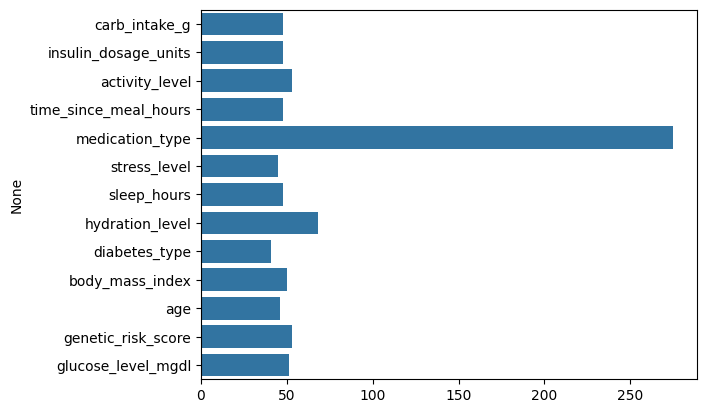

In [7]:
sns.barplot(y=df.isnull().sum().index,x=df.isnull().sum().values)

In [8]:
df_cleaned = df.copy()

In [9]:
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
for col in numeric_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())

In [10]:
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

In [11]:
df_cleaned.isnull().sum()

,0
carb_intake_g,0
insulin_dosage_units,0
activity_level,0
time_since_meal_hours,0
medication_type,0
stress_level,0
sleep_hours,0
hydration_level,0
diabetes_type,0
body_mass_index,0


In [12]:

df_cleaned.to_csv("blood_glucose_cleaned.csv", index=False)

print("\nCleaned dataset saved as blood_glucose_cleaned.csv")


Cleaned dataset saved as blood_glucose_cleaned.csv


In [13]:
df_cleaned = pd.read_csv("blood_glucose_cleaned.csv")

In [14]:
df_cleaned.head(10)

,carb_intake_g,insulin_dosage_units,activity_level,time_since_meal_hours,medication_type,stress_level,sleep_hours,hydration_level,diabetes_type,body_mass_index,age,genetic_risk_score,glucose_level_mgdl
0,98.544851,33.153240,Vigorous,6.903038,Metformin,Medium,6.048549,Inadequate,Pre-diabetes,40.409136,41.0,Medium,238.322251
1,95.759835,23.901177,Vigorous,1.050308,Insulin,Medium,7.698804,Inadequate,Gestational,19.972059,33.0,Low,154.309089
2,147.679608,35.208679,Moderate,6.173139,Sulfonylurea,Medium,5.974567,Inadequate,Type 2,26.263152,52.0,Medium,107.276738
3,66.574704,30.156287,Light,6.817482,Insulin,High,4.935384,Adequate,Gestational,29.283760,29.0,High,70.464152
4,65.745115,24.212904,Vigorous,6.714379,Metformin,Medium,4.003390,Inadequate,Gestational,26.354101,63.0,High,167.714513
5,94.070892,17.292708,Vigorous,2.539663,Sulfonylurea,Medium,8.488332,Inadequate,Pre-diabetes,20.154097,60.0,Medium,185.835735
6,101.148632,40.989257,Sedentary,2.120028,Sulfonylurea,Medium,6.713882,Adequate,Type 2,30.144008,57.0,Medium,173.058896
7,43.941834,22.020625,Moderate,2.896812,Insulin,Medium,9.072601,Adequate,Gestational,23.985618,39.0,Low,154.373620
8,119.221165,38.851104,Light,2.904026,Insulin,Low,8.823657,Adequate,Gestational,34.030845,61.0,High,237.223244
9,17.171061,30.209166,Moderate,4.005620,Sulfonylurea,Medium,4.216787,Adequate,Pre-diabetes,40.517483,79.0,Low,91.672253


3. EDA and Data Visiualization

num(bar) categoricall(scatter)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Load cleaned dataset
df = pd.read_csv("blood_glucose_cleaned.csv")


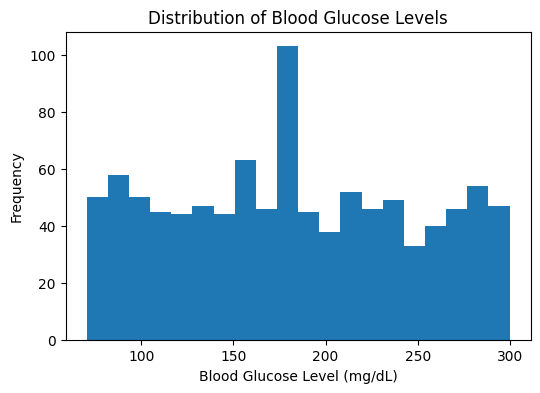

In [17]:
# 1. Histogram – Blood Glucose
plt.figure(figsize=(6,4))
plt.hist(df["glucose_level_mgdl"], bins=20)
plt.xlabel("Blood Glucose Level (mg/dL)")
plt.ylabel("Frequency")
plt.title("Distribution of Blood Glucose Levels")
plt.show()

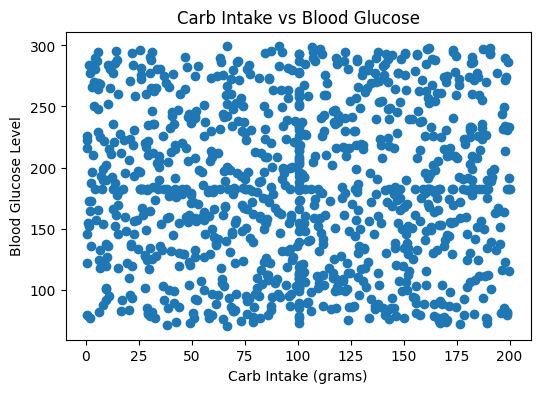

In [18]:
# 2. Scatter Plot – Carb vs Glucose
plt.figure(figsize=(6,4))
plt.scatter(df["carb_intake_g"], df["glucose_level_mgdl"])
plt.xlabel("Carb Intake (grams)")
plt.ylabel("Blood Glucose Level")
plt.title("Carb Intake vs Blood Glucose")
plt.show()

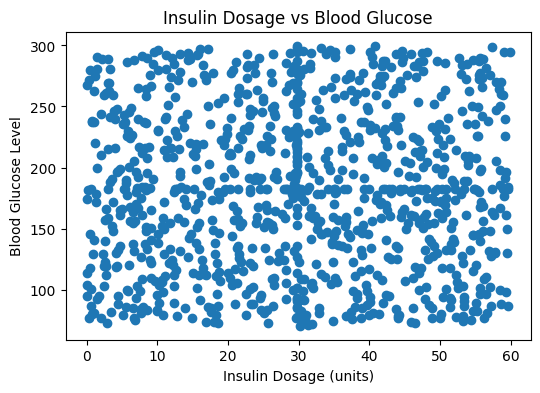

In [19]:
# 3. Scatter Plot – Insulin vs Glucose
plt.figure(figsize=(6,4))
plt.scatter(df["insulin_dosage_units"], df["glucose_level_mgdl"])
plt.xlabel("Insulin Dosage (units)")
plt.ylabel("Blood Glucose Level")
plt.title("Insulin Dosage vs Blood Glucose")
plt.show()

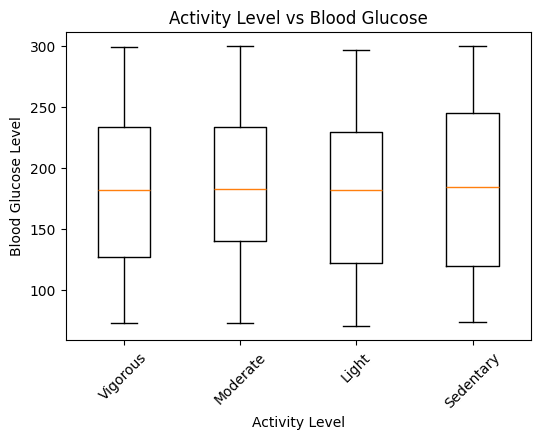

In [20]:
import matplotlib.pyplot as plt

# 4. box Plot – Activity vs Glucose
plt.figure(figsize=(6,4))
# Prepare data for boxplot: group glucose levels by activity level
activity_levels = df["activity_level"].unique()
glucose_by_activity = [df["glucose_level_mgdl"][df["activity_level"] == level] for level in activity_levels]

plt.boxplot(glucose_by_activity)
plt.xlabel("Activity Level")
plt.ylabel("Blood Glucose Level")
plt.title("Activity Level vs Blood Glucose")
plt.xticks(ticks=range(1, len(activity_levels) + 1), labels=activity_levels, rotation=45)
plt.show()

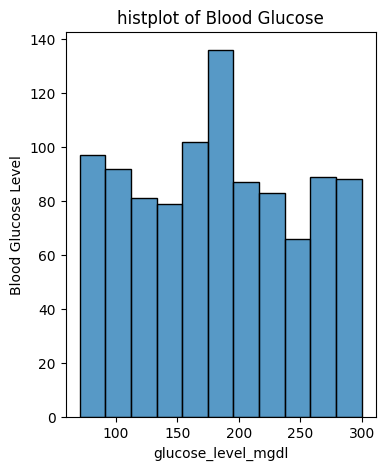

In [21]:
# 5. histplot – Glucose Levels
plt.figure(figsize=(4,5))
sns.histplot(df["glucose_level_mgdl"])
plt.ylabel("Blood Glucose Level")
plt.title("histplot of Blood Glucose")
plt.show()

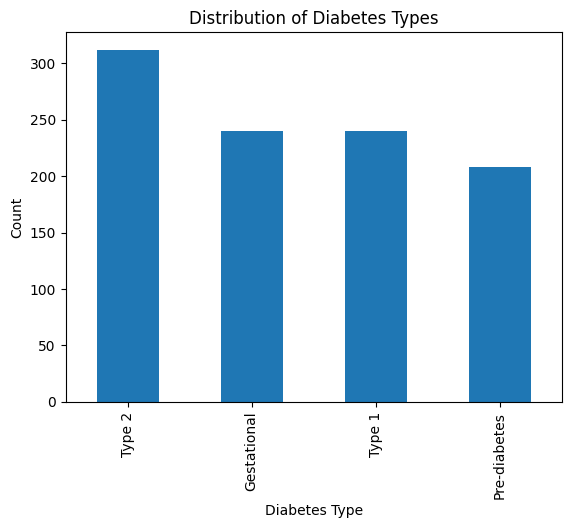

In [22]:
# 6. Bar Chart – Diabetes Type Count
df["diabetes_type"].value_counts().plot(kind="bar")
plt.xlabel("Diabetes Type")
plt.ylabel("Count")
plt.title("Distribution of Diabetes Types")
plt.show()

4. Different Types of Regression

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Load Dataset

df = pd.read_csv("blood_glucose_cleaned.csv")


# Select Features & Target

X = df[[
    "carb_intake_g",
    "insulin_dosage_units",
    "sleep_hours",
    "body_mass_index",
    "age"
]]

y = df["glucose_level_mgdl"]


# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Evaluation Function

def evaluate(model, name):
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))



# 1. Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate(lr, "Linear Regression")


# 2. Decision Tree Regression

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
evaluate(dt, "Decision Tree Regression")



# 3. Random Forest Regression

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
evaluate(rf, "Random Forest Regression")



Linear Regression
MAE: 54.59179225343661
RMSE: 64.41312836051297
R2 Score: 0.002731434566130897

Decision Tree Regression
MAE: 72.89355549844801
RMSE: 90.53373155866025
R2 Score: -0.9700814791406402

Random Forest Regression
MAE: 56.29052774280848
RMSE: 66.44033291609092
R2 Score: -0.0610282462339069


5. Different types of conventional classification

In [24]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# Load Dataset

df = pd.read_csv("blood_glucose_cleaned.csv")


# Create Glucose Category (Target)

def glucose_category(value):
    if value < 70:
        return "Low"
    elif value <= 140:
        return "Normal"
    else:
        return "High"

df["glucose_class"] = df["glucose_level_mgdl"].apply(glucose_category)


# Select Features


X = df[
    ["carb_intake_g",
     "insulin_dosage_units",
     "sleep_hours",
     "body_mass_index",
     "age"]
]

y = df["glucose_class"]

# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)


# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Evaluation Function

def evaluate(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



# 1. Logistic Regression

evaluate(LogisticRegression(max_iter=1000), "Logistic Regression")


# 2. KNN

evaluate(KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors")

# 3. Naive Bayes

evaluate(GaussianNB(), "Naive Bayes")


# 4. Support Vector Machine

evaluate(SVC(), "Support Vector Machine")


# 5. Decision Tree

evaluate(DecisionTreeClassifier(random_state=42), "Decision Tree Classifier")



Logistic Regression
Accuracy: 0.675
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       135
           1       0.00      0.00      0.00        65

    accuracy                           0.68       200
   macro avg       0.34      0.50      0.40       200
weighted avg       0.46      0.68      0.54       200


K-Nearest Neighbors
Accuracy: 0.615
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       135
           1       0.29      0.12      0.17        65

    accuracy                           0.61       200
   macro avg       0.48      0.49      0.46       200
weighted avg       0.54      0.61      0.56       200


Naive Bayes
Accuracy: 0.675
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       135
           1       0.00      0.00      0.00        65

    accuracy                           0.68       200
   macro avg       0.34  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

6. Classification using neural networks

In [25]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score


# Load Dataset

df = pd.read_csv("blood_glucose_cleaned.csv")


# Create Classes
def glucose_category(value):
    if value < 70:
        return "Low"
    elif value <= 140:
        return "Normal"
    else:
        return "High"

df["glucose_class"] = df["glucose_level_mgdl"].apply(glucose_category)


# Select Features
X = df[
    ["carb_intake_g",
     "insulin_dosage_units",
     "sleep_hours",
     "body_mass_index",
     "age"]
]

y = df["glucose_class"]

# Encode target labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Determine the number of unique classes after encoding
num_classes = len(np.unique(y_encoded))

y_categorical = to_categorical(y_encoded, num_classes=num_classes)


# Feature scaling (IMPORTANT for NN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42
)


# Build Neural Network
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))   # Use num_classes for the output layer


# Compile Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Train Model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)


# Evaluate Model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nAccuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=encoder.classes_))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3145 - loss: 0.9362 - val_accuracy: 0.5750 - val_loss: 0.7061
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6268 - loss: 0.6712 - val_accuracy: 0.7125 - val_loss: 0.6156
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7164 - loss: 0.6105 - val_accuracy: 0.7375 - val_loss: 0.5901
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6779 - loss: 0.6163 - val_accuracy: 0.7375 - val_loss: 0.5814
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6933 - loss: 0.6129 - val_accuracy: 0.7375 - val_loss: 0.5817
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7123 - loss: 0.5874 - val_accuracy: 0.7375 - val_loss: 0.5796
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7085 - loss: 0.5927 - val_accuracy: 0.7375 - val_loss: 0.5792
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6838 - loss: 0.6155 - val_accuracy: 0.7375 - val_loss

User Interface


In [26]:
X.columns

Index(['carb_intake_g', 'insulin_dosage_units', 'sleep_hours',
       'body_mass_index', 'age'],
      dtype='object')

In [27]:
!pip install gradio


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load your uploaded dataset
df = pd.read_csv("blood_glucose_cleaned.csv")

# Display first few rows
df.head()

,carb_intake_g,insulin_dosage_units,activity_level,time_since_meal_hours,medication_type,stress_level,sleep_hours,hydration_level,diabetes_type,body_mass_index,age,genetic_risk_score,glucose_level_mgdl
0,98.544851,33.153240,Vigorous,6.903038,Metformin,Medium,6.048549,Inadequate,Pre-diabetes,40.409136,41.0,Medium,238.322251
1,95.759835,23.901177,Vigorous,1.050308,Insulin,Medium,7.698804,Inadequate,Gestational,19.972059,33.0,Low,154.309089
2,147.679608,35.208679,Moderate,6.173139,Sulfonylurea,Medium,5.974567,Inadequate,Type 2,26.263152,52.0,Medium,107.276738
3,66.574704,30.156287,Light,6.817482,Insulin,High,4.935384,Adequate,Gestational,29.283760,29.0,High,70.464152
4,65.745115,24.212904,Vigorous,6.714379,Metformin,Medium,4.003390,Inadequate,Gestational,26.354101,63.0,High,167.714513


Trained model

In [29]:
# Define input features and target
X = df[[
    "carb_intake_g",
    "insulin_dosage_units",
    "sleep_hours",
    "body_mass_index",
    "age"
]]
y = df["glucose_level_mgdl"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model Training Completed ✅")

Model Training Completed ✅


User interface

In [30]:
import gradio as gr

# Dummy login credentials
USERNAME = "admin"
PASSWORD = "1234"

# Risk level function
def glucose_risk_level(value):
    if value < 70:
        return "Low (Hypoglycemia Risk)"
    elif 70 <= value <= 140:
        return "Normal"
    else:
        return "High (Hyperglycemia Risk)"

# Prediction function
def predict_glucose(carb_intake_g_val, insulin_dosage_units_val, sleep_hours_val, body_mass_index_val, age_val):

    input_data = np.array([[carb_intake_g_val, insulin_dosage_units_val, sleep_hours_val, body_mass_index_val, age_val]])
    prediction = model.predict(input_data)[0]

    risk = glucose_risk_level(prediction)

    return f"Estimated Blood Glucose Level: {prediction:.2f} mg/dL\nRisk Level: {risk}"

# Login function
def login(username, password):
    if username == USERNAME and password == PASSWORD:
        return gr.update(visible=False), gr.update(visible=True)
    else:
        return gr.update(value="Invalid Username or Password", visible=True), gr.update()

# Create UI
with gr.Blocks(theme=gr.themes.Soft()) as demo:

    gr.Markdown("# ⚕️ Blood Glucose Level Estimation System")
    gr.Markdown("### Predict glucose level based on diet intake, insulin dosage, and activity level")

    # Login Section
    with gr.Column(visible=True) as login_section:
        gr.Markdown("## 🔐 Login")
        username = gr.Textbox(label="Username")
        password = gr.Textbox(label="Password", type="password")
        login_button = gr.Button("Login")
        login_message = gr.Textbox(label="", interactive=False, visible=False)

    # Prediction Section
    with gr.Column(visible=False) as prediction_section:
        gr.Markdown("## 🧪 Enter Patient Details")

        carbs = gr.Number(label="Carbohydrate Intake (grams)")
        insulin = gr.Number(label="Insulin Dosage (units)")
        activity = gr.Number(label="Sleep Duration (hours)")
        sugar = gr.Number(label="Body Mass Index (BMI)")
        calories = gr.Number(label="age")

        predict_button = gr.Button("Predict Blood Glucose Level")
        output = gr.Textbox(label="Prediction Result")

    # Button actions
    login_button.click(
        login,
        inputs=[username, password],
        outputs=[login_section, prediction_section]
    )

    predict_button.click(
        predict_glucose,
        inputs=[carbs, insulin, activity, sugar, calories],
        outputs=output
    )

demo.launch()

/tmp/ipython-input-1637573467.py:34: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(theme=gr.themes.Soft()) as demo:


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://de79c33fb8f4a7fcaf.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [31]:
df_cleaned.head(10)

,carb_intake_g,insulin_dosage_units,activity_level,time_since_meal_hours,medication_type,stress_level,sleep_hours,hydration_level,diabetes_type,body_mass_index,age,genetic_risk_score,glucose_level_mgdl
0,98.544851,33.153240,Vigorous,6.903038,Metformin,Medium,6.048549,Inadequate,Pre-diabetes,40.409136,41.0,Medium,238.322251
1,95.759835,23.901177,Vigorous,1.050308,Insulin,Medium,7.698804,Inadequate,Gestational,19.972059,33.0,Low,154.309089
2,147.679608,35.208679,Moderate,6.173139,Sulfonylurea,Medium,5.974567,Inadequate,Type 2,26.263152,52.0,Medium,107.276738
3,66.574704,30.156287,Light,6.817482,Insulin,High,4.935384,Adequate,Gestational,29.283760,29.0,High,70.464152
4,65.745115,24.212904,Vigorous,6.714379,Metformin,Medium,4.003390,Inadequate,Gestational,26.354101,63.0,High,167.714513
5,94.070892,17.292708,Vigorous,2.539663,Sulfonylurea,Medium,8.488332,Inadequate,Pre-diabetes,20.154097,60.0,Medium,185.835735
6,101.148632,40.989257,Sedentary,2.120028,Sulfonylurea,Medium,6.713882,Adequate,Type 2,30.144008,57.0,Medium,173.058896
7,43.941834,22.020625,Moderate,2.896812,Insulin,Medium,9.072601,Adequate,Gestational,23.985618,39.0,Low,154.373620
8,119.221165,38.851104,Light,2.904026,Insulin,Low,8.823657,Adequate,Gestational,34.030845,61.0,High,237.223244
9,17.171061,30.209166,Moderate,4.005620,Sulfonylurea,Medium,4.216787,Adequate,Pre-diabetes,40.517483,79.0,Low,91.672253
